<a href="https://colab.research.google.com/github/maronga/Predicting-Used-car-prices-using-ANN/blob/main/Neural_Network_Regression_Predicting_the_Price_of_Used_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Price of Used Cars Based on Input Variables

By
 John Maronga

 Joshua Kibuye

 Daisy Wanjiru

 Victoria Maina

 Brendah Koro
 
 Geoffery Chege

## 1.Defining the Question

### a) Specifying the Data Analytic Question

> To create a model that will be used to predict prices of  used cars .

### b) Defining the Metric for Success

This project will be successful when:

1) We create a model that has the lowest RMSE 





### c) Understanding the context 

 Used-car market is more than twice the size of the new-car segment and is outpacing it in growth..It has been realized  too that the price of cars keeping  changing depending on various factors .Below are features of a used car that matters most when people are buying used-cars at auctions

Date : The year of production of the cars.

Make : The brand of the car.

Model : The edition of the car of a specific brand.

Trim : The trim levels for a car are just different versions of the model.

Body : The body style of a vehicle refers to the shape and model of a particular car make.

Transmission : The mechanism that moves the power from the engine to the wheels.

VIN : Vehichel identification number.

State : The state in which the car is auctioned.

Condition : The condition of the cars being at the time of auction.

Odometer : The distance the car has travelled since manufactured.

Color : Exterior color of the car.

Interior : Interior color of the car.

Seller : The seller of the car, car dealers.

mmr : Manhiem market record, the market estimated price of the cars.

sellingprice : The price a car was sold at auctions.

saledate : The date on which the car has been sold


### d) Recording the Experimental Design

* Business Understanding

* Reading the data

* Checking our data

* Data cleaning

* Performing EDA(univiariate,biviariate and multiviariate analysis)

* Feature Engineering

* Linear Regression

* Ada Boost 
  
* Random Forest Regressor

* Conclusion

### e) Data Relevance

Datasets Provided:

Used Car prices [Link](https://www.kaggle.com/tunguz/used-car-auction-prices/download)

## 2.Reading the Data

In [145]:
# Importing the libraries we will need 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [146]:
# Loading the Data from the source i.e. csv
import zipfile
# read the dataset using the compression zip
df = pd.read_csv('https://github.com/maronga/Used-car-auction-prices/blob/main/archive_8.zip?raw=true',compression='zip', error_bad_lines=False)

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1



## 3.Checking the Data

In [147]:
# Determining the no. of records in our dataset
df.shape

(558811, 16)

Our dataset has 558,811 records and 16 variables

In [148]:
# Previewing the top of our dataset
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [149]:
# Previewing the bottom of our dataset
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558810,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008.0,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [150]:
# Checking whether each column has an appropriate datatype
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

Saledate is an object instead of datetime in format, we will change that during data cleaning.

In [151]:
#Checking the columns in the dataset
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

## 4.External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5.Tidying the Dataset

In [152]:
# Checking for Anomalies
for i in df.columns:
    u = df[i].unique()
    print('Unique values of ', i , 'is' , u)

Unique values of  year is [2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1995 1996 1997 1987 1994 1993 1992 1989 1991 1990
 1986 1985 1988 1984 1982 1983]
Unique values of  make is ['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai 

More investigation is needed in some columns.

In [153]:
#hecking for dashes in the interior and color column
print(df['interior'].unique())
print(df['color'].unique())

['black' 'beige' 'tan' '—' 'gray' 'brown' 'burgundy' 'white' nan 'silver'
 'off-white' 'blue' 'red' 'yellow' 'green' 'purple' 'orange' 'gold']
['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' nan 'orange'
 'off-white' 'turquoise' 'pink' 'lime']


In [154]:
#Checking columns where interior is a dash
df[df['color'] == '—'].count()

year            24685
make            24487
model           24476
trim            24483
body            24451
transmission    22338
vin             24685
state           24685
condition       24614
odometer        24685
color           24685
interior        24685
seller          24685
mmr             24685
sellingprice    24685
saledate        24685
dtype: int64

In [155]:
#Checking columns where color is a dash
df[df['color'] == '—'].count()

year            24685
make            24487
model           24476
trim            24483
body            24451
transmission    22338
vin             24685
state           24685
condition       24614
odometer        24685
color           24685
interior        24685
seller          24685
mmr             24685
sellingprice    24685
saledate        24685
dtype: int64

There are instances where the color and interior is a dash (24685). We will consider them as null values.

In [156]:
#Replacing the dashes with a null
df.replace(['—'], np.nan, inplace=True)

Anywhere in the dataset there is a dash has been replaced as a null.

In [157]:
#The states are all in lower case, we will make them upper case
df['state'] = df['state'].str.upper()
print(df['state'].unique())

['CA' 'TX' 'PA' 'MN' 'AZ' 'WI' 'TN' 'MD' 'FL' 'NE' 'NJ' 'NV' 'OH' 'MI'
 'GA' 'VA' 'SC' 'NC' 'IN' 'IL' 'CO' 'UT' 'MO' 'NY' 'MA' 'PR' 'OR' 'LA'
 'WA' 'HI' 'QC' 'AB' 'ON' 'OK' 'MS' 'NM' 'AL' 'NS']


The change has taken effect

In [158]:
#Converting the saledate from object to date type
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
print(df['saledate'].unique())

<DatetimeArray>
['2014-12-16 04:30:00+00:00', '2015-01-14 20:30:00+00:00',
 '2015-01-28 20:30:00+00:00', '2014-12-18 04:30:00+00:00',
 '2014-12-30 04:00:00+00:00', '2014-12-17 04:30:00+00:00',
 '2014-12-16 05:00:00+00:00', '2014-12-18 04:00:00+00:00',
 '2015-01-19 20:00:00+00:00', '2014-12-16 04:00:00+00:00',
 ...
 '2015-06-18 18:45:00+00:00', '2015-06-29 21:00:00+00:00',
 '2015-06-17 21:40:00+00:00', '2015-06-23 01:00:00+00:00',
 '2015-06-23 21:45:00+00:00', '2015-06-25 00:10:00+00:00',
 '2015-07-08 02:05:00+00:00', '2015-07-07 01:45:00+00:00',
 '2015-07-02 06:20:00+00:00', '2015-07-08 02:45:00+00:00']
Length: 3745, dtype: datetime64[ns, UTC]


The salesdate column is now based on our current time and not different time zones.

In [159]:
#Looking for duplicates in unique column
df['vin'].duplicated().sum()

8515

VIN is a unique registration number to vehicles. Any duplicates means the data is false.

In [160]:
#Dropping the duplicates in the vin column
df = df.drop_duplicates(subset=['vin'], keep='first')

In [161]:
#Checking if the changes have taken effect
df['vin'].duplicated().sum()

0

There are no more duplicates in the vin.

In [162]:
#The make column has double entries due to some being upper case while others lowercase.
print(df['make'].unique())
print(df['make'].nunique())

['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']
96


There are 96 values which is incorrect.

In [163]:
#We will correct by making it all in lower case
df['make'] = df['make'].str.lower()
print(df['make'].nunique())

66


After lowering the strings there is now 66 unique values

In [164]:
#The same applies to model and body
#Applying cleaning to model
print(df['model'].nunique())
df['model'] = df['model'].str.lower()
print(df['model'].nunique())

973
851


The unique values of model drop from 973 to 851

In [165]:
#Applying cleaning to body
print(df['body'].nunique())
df['body'] = df['body'].str.lower()
print(df['body'].nunique())

85
45


The unique values in body reduce from 85 to 45

In [166]:
#Applying cleaning to trim
print(df['trim'].nunique())
df['trim'] = df['trim'].str.lower()
print(df['trim'].nunique())

1975
1901


Unique values in trim drop from 1975 to 1901

In [167]:
#Adding month column by splitting the date time column for better analysis
df['month'] = pd.to_datetime(df['saledate']).dt.month

In [168]:
#Dropping columns
df.drop(columns=['vin', 'saledate'], inplace = True)

* We drop the vin column because it is a unique registration number and not relevant to our study.
* We drop the saledate column as we will work with the year and month column in case of a time series analysis which we don't plan on.

In [169]:
#Looking at the dataset thus far
df.head(2)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,month
0,2015,kia,sorento,lx,suv,automatic,CA,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,12
1,2015,kia,sorento,lx,suv,automatic,CA,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,12


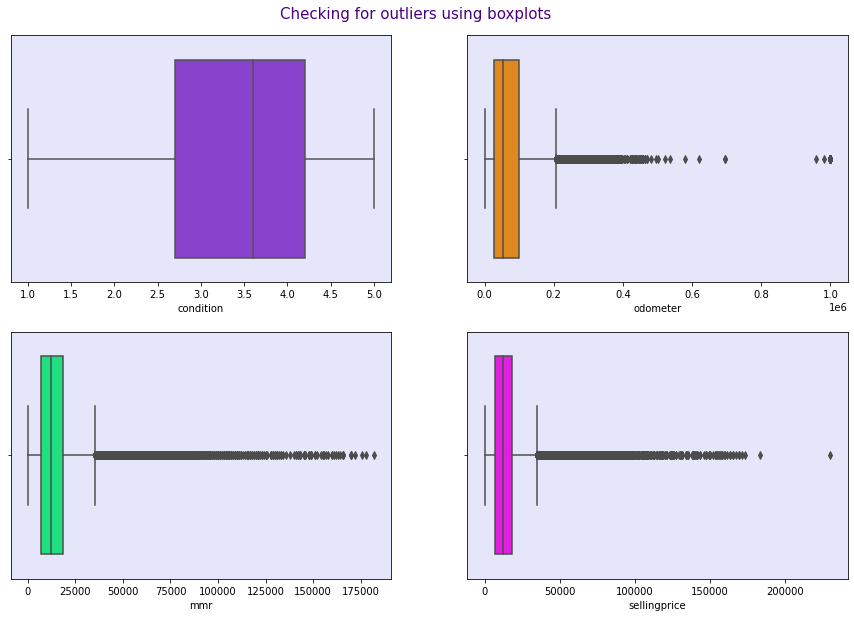

In [170]:
# Checking for Outliers
# Creating a list of columns to check for outliers
col_list = ['condition', 'odometer', 'mmr','sellingprice']
# Creating a list of colors
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia','red']
# Plotting boxplots of the col_list columns to check for outliers
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
    sns.boxplot(df[column], ax = ax, color = color)
# Setting the background color to lavender
    ax.set_facecolor('lavender') 


There are outliers in our dataset. However, we will not drop them as they are true values.
* The mmr, odometer and prices of a used car vary and some can be much higher than the others. The outliers are not due to errors in data entry but represent real data.

In [171]:
# Identifying the Missing Data
df.isnull().sum()

year                0
make            10104
model           10202
trim            10451
body            12987
transmission    64473
state               0
condition       11784
odometer           88
color           25212
interior        17687
seller              0
mmr                 0
sellingprice        0
month               0
dtype: int64

In [172]:
#Checking for the percentage of the missing values
df.isna().mean().round(4) * 100

year             0.00
make             1.84
model            1.85
trim             1.90
body             2.36
transmission    11.72
state            0.00
condition        2.14
odometer         0.02
color            4.58
interior         3.21
seller           0.00
mmr              0.00
sellingprice     0.00
month            0.00
dtype: float64

* Most of the data's null values don't take a large percentage
* Transmission has a high percentage and further investigation will be done to decide on the best way to deal with it

In [173]:
# Dealing with the Missing Data
#Transmission
round(df.transmission.value_counts()/sum(df.transmission.value_counts())*100,2)
#filling null values of transmission column with automatic
df.transmission.fillna("automatic", inplace=True)

An overwhelming 96% of all known cars has an automatic transmission. Because of this the missing data in the transmission column will be updated with "automatic".

In [174]:
# Dropping the other null values
df.dropna(inplace=True)

We drop the null values due to the small percentage. They won't affect the accuracy of the data.

In [175]:
#Checking if the changes are in place
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
month           0
dtype: int64

There are no null values.

In [176]:
#Checking for duplicates
df.duplicated().sum()

0

There are no duplicate values in the dataset.

In [177]:
#Checking the shape of the dataset after cleaning
df.shape

(489908, 15)

We now have 489908 records and 15 variables.

In [178]:
#Exporting the clean dataset as a csv
df.to_csv('cars.csv')

## 6.Exploratory Data Analysis

### 6.1 Univariate Analysis

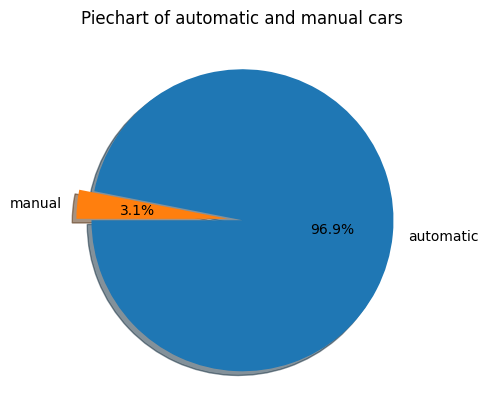

In [179]:
#Pie chart of automatic and manual cars
accounts = df['transmission'].value_counts()
labels = accounts.index
values = accounts.values

plt.figure(figsize=(5,5), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0,0.1), shadow=True, startangle=180)
plt.title('Piechart of automatic and manual cars', color='black')
plt.show()

Most cars are automatic transmission

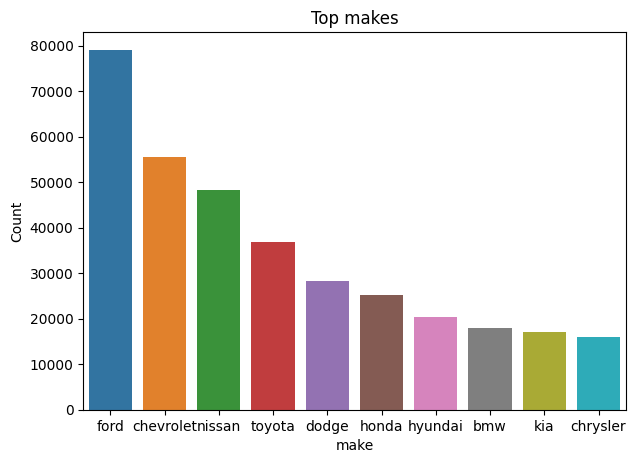

In [180]:
#A countplot of the most popular makes of vehicles
plt.figure(figsize = (7,5), dpi=100)
sns.countplot(df['make'], order=df['make'].value_counts().index[:10])
plt.title('Top makes')
plt.ylabel("Count")
plt.show()

Ford, Chevrolet, and Nissan were the most popular makes

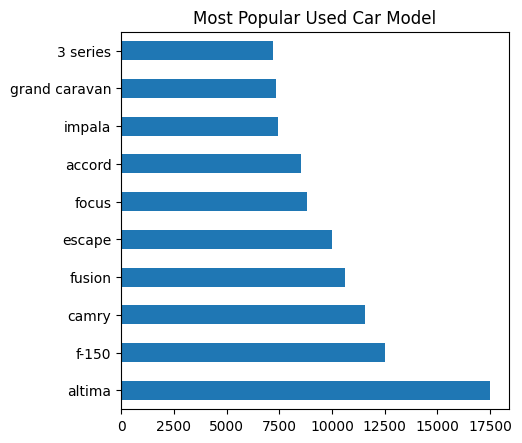

In [181]:
#Bar chart of the ten most popular used car models
plt.figure(figsize=(5,5), dpi=100)
df['model'].value_counts().head(10).plot(kind = "barh", title = "Most Popular Used Car Model",y ="type of model" ,x ="count");

Altima is the most popular used car model

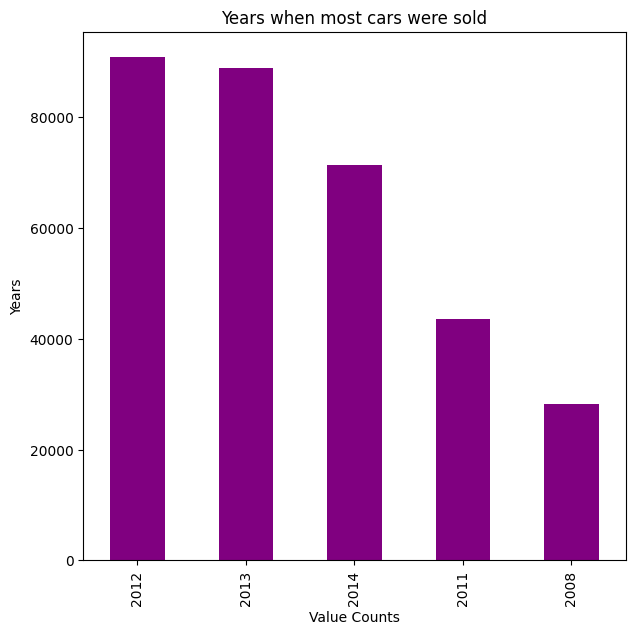

In [182]:
#creating a bar graph of the years with the largest records of used cars sold
plt.figure(figsize = (7,7), dpi = 100)
df.year.value_counts().head()
df.year.value_counts().head().plot(kind= 'bar',color='purple')
plt.title('Years when most cars were sold')
plt.xlabel('Value Counts')
plt.ylabel('Years')
plt.show()

2012 is the year when most used cars were sold. Most used cars were sold past 2010 with 2008 being the only outlier.

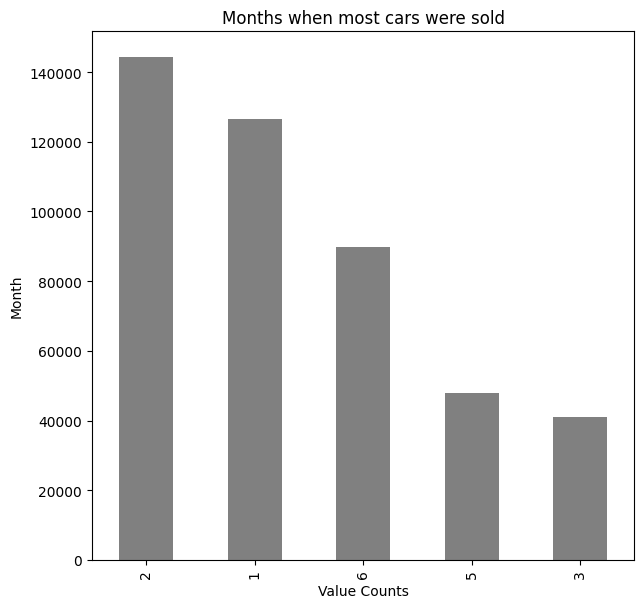

In [183]:
#creating a bar graph of the months with the largest records of used cars sold
plt.figure(figsize = (7,7), dpi = 100)
df.month.value_counts().head()
df.month.value_counts().head().plot(kind= 'bar',color='grey')
plt.title('Months when most cars were sold')
plt.xlabel('Value Counts')
plt.ylabel('Month')
plt.show()

The month of February is when most cars were sold. Generally, most used cars were sold in the first half of the year.

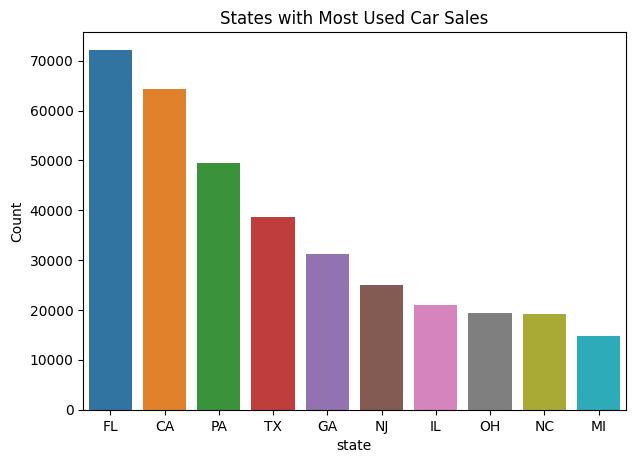

In [184]:
#A countplot of the states accounting for most purchases of used vehicles
plt.figure(figsize = (7,5), dpi=100)
sns.countplot(df['state'], order=df['state'].value_counts().index[:10])
plt.title('States with Most Used Car Sales')
plt.ylabel("Count")
plt.show()

Florida, California, and Pennsylvania accounted for most used car sales.

---



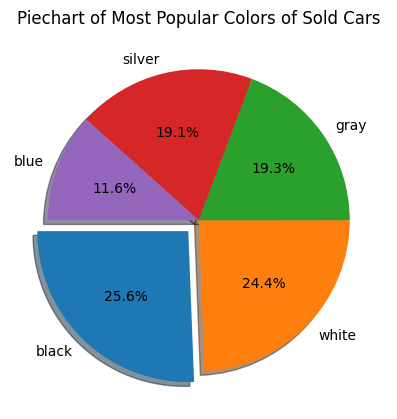

In [185]:
#Pie chart of the most popular color for cars
accounts = df['color'].value_counts().head()
labels = accounts.index
values = accounts.values

plt.figure(figsize=(5,5), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0.1, 0, 0, 0, 0), shadow=True, startangle=180)
plt.title('Piechart of Most Popular Colors of Sold Cars', color='black')
plt.show()

Black and white accounted for the color of most used cars sold.

In [186]:
#Frequency table of the most common seller
seller = pd.DataFrame(df['seller'].value_counts())
seller.head()

,seller
nissan-infiniti lt,18023
the hertz corporation,17710
"ford motor credit company,llc",16237
santander consumer,14427
avis corporation,11948


Nissan-Infiniti IT is the seller that sold the most used cars in the time period.

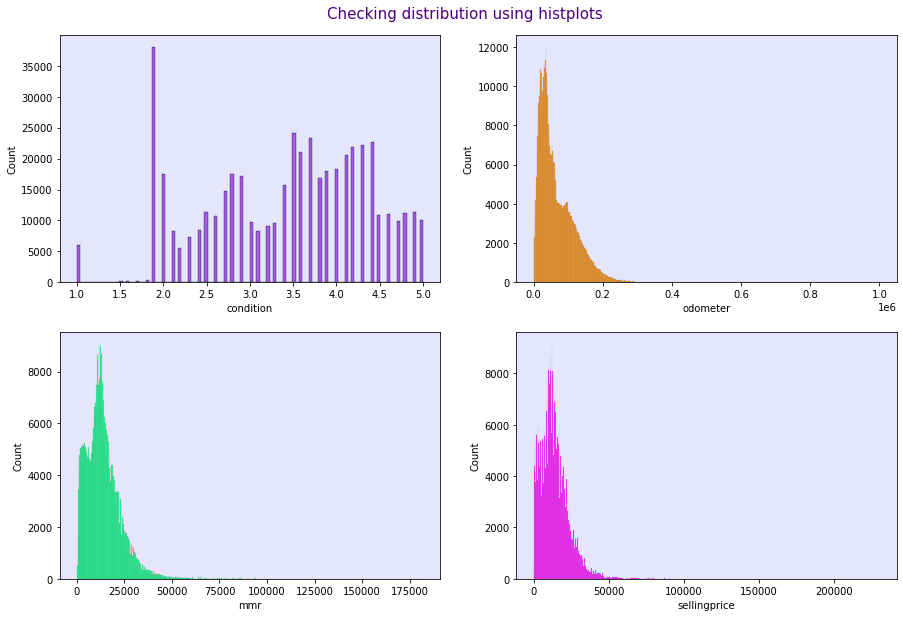

In [187]:
#Plotting histograms of the numerical columns in the dataset
# Creating a list of columns to check for distribution using hisplots
col_list = ['condition', 'odometer', 'mmr','sellingprice']
# Creating a list of colors
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia','red']
# Plotting histplots of the col_list columns to check for distribution using hisplots
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking distribution using histplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
    sns.histplot(df[column], ax = ax, color = color)
    ax.set_facecolor('lavender') # Setting the background color to lavender

* Condition is almost normally distributed
* odometer, mmr and selling price are positively skewed


#### Measures of central tendency and dispersion

In [188]:
#Checking for the mean, mode and median
from numpy.ma.core import append
numerical_columns=['year','condition','mmr','odometer','sellingprice']
for column in numerical_columns:
    print('\n')
    print('The mean of ' + column +  ' is: ' + str(df[column].mean()))
    print('The mode of ' + column + ' is: ' + str(df[column].mode()))
    print('The median of ' + column + ' is: ' + str(df[column].median()))



The mean of year is: 2010.173259060885
The mode of year is: 0    2012
dtype: int64
The median of year is: 2012.0


The mean of condition is: 3.42476138376754
The mode of condition is: 0    1.9
dtype: float64
The median of condition is: 3.6


The mean of mmr is: 13838.333523845293
The mode of mmr is: 0    11650
dtype: int64
The median of mmr is: 12350.0


The mean of odometer is: 67047.72592200985
The mode of odometer is: 0    1.0
dtype: float64
The median of odometer is: 51246.0


The mean of sellingprice is: 13685.396631612466
The mode of sellingprice is: 0    11000
dtype: int64
The median of sellingprice is: 12200.0


In [189]:
#Checking the standard deviation
df[col_list].std()

condition           0.942590
odometer        52353.721479
mmr              9510.200523
sellingprice     9578.829274
dtype: float64

* There is a high standard deviation in the columns apart from condition.
* Odometer has the highest standard deviation

In [190]:
#Checking the variance
df[col_list].var().apply(lambda x: '%.5f' % x)

condition                0.88848
odometer        2740912152.68407
mmr               90443913.98828
sellingprice      91753970.25177
dtype: object

* There is a high variance in the columns apart from condition.
* Odometer has the highest variance

In [191]:
#Checking the skewness
df[col_list].skew()

condition      -0.344585
odometer        1.910943
mmr             2.019179
sellingprice    1.972050
dtype: float64

* Condition is negatively skewed. The mean is lower than the median
* Odometer, mmr, and sellingprice are positively skewed

In [192]:
#Checking the kurtosis
df[col_list].kurt()

condition       -0.799834
odometer        14.744886
mmr             12.094971
sellingprice    11.774692
dtype: float64

* The condition column is platykurtic.
* Odometer, mmr, and sellingprice are leptorkurtic and have extreme values

### 6.2 Bivariate Analysis

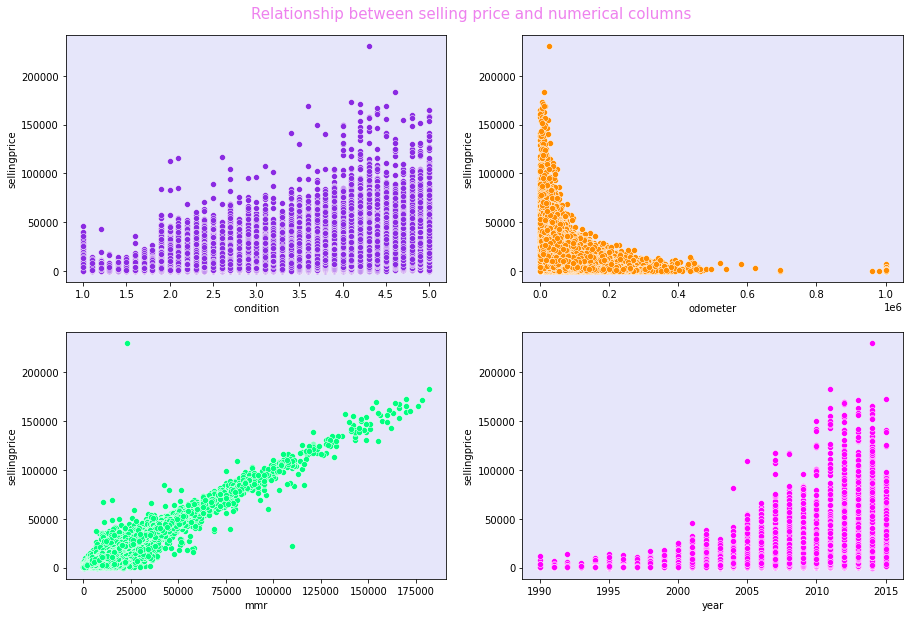

In [193]:
# Comparing our numerical columns to the selling price
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia','red']
cols = ['condition', 'odometer', 'mmr', 'year']
# Plotting scatterplots of the cols columns to check for relationship with selling price
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Relationship between selling price and numerical columns', fontsize = 15, y = 0.92, color = 'violet')
for ax, data, column, color in zip(axes.flatten(), df, cols, colors):
    sns.scatterplot(df[column], df['sellingprice'], ax = ax, color = color)
    ax.set_facecolor('lavender') # Setting the background color to lavender

* There is a linear relationship between sellingprice and mmr, and selling price and condition.
* There is an inverse relationship between sellingprice and odometer.
* Over the years, the selling price of used vehicles has grown but not exactly in a linear way.

In [194]:
# Applying label encoding for better bivariate and multivariate analysis
from sklearn.preprocessing import LabelEncoder
columns =['make', 'model', 'trim', 'body', 'transmission', 'state',
       'color', 'interior', 'seller']
# we convert the categorical variables 
df[columns] = df[columns].apply(LabelEncoder().fit_transform)
#Checking the changes
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,month
0,2015,24,637,883,38,0,3,5.0,16639.0,17,1,6182,20500,21500,12
1,2015,24,637,883,38,0,3,5.0,9393.0,17,0,6182,20800,21500,12
2,2014,4,8,259,35,0,3,4.5,1331.0,7,1,4243,31900,30000,1
3,2015,52,582,1253,35,0,3,4.1,14282.0,17,1,11865,27500,27750,1
4,2014,4,33,342,35,0,3,4.3,2641.0,7,1,4243,66000,67000,12


In [195]:
#Pairplot showing the relationship between the various colums
#plt.figure(figsize = (20, 20), dpi=100)
#sns.pairplot(df, hue = 'sellingprice')

In [196]:
#Looking at the correlation of the columns in the dataset to the selling price
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,month
year,1.000000,-0.012752,-0.040897,0.070243,0.027088,-0.086358,0.017022,0.545293,-0.774048,0.035081,-0.200561,0.011831,0.591550,0.581363,0.016492
make,-0.012752,1.000000,0.042876,-0.096720,0.045021,0.040996,-0.031070,-0.018008,-0.020683,-0.003431,0.002933,0.164779,-0.063883,-0.061430,0.008329
model,-0.040897,0.042876,1.000000,0.108025,0.032618,0.008984,0.021901,-0.003454,0.054425,0.003995,0.021998,0.032701,0.013310,0.013612,-0.000568
trim,0.070243,-0.096720,0.108025,1.000000,-0.010859,-0.010224,0.044073,0.050667,-0.017773,0.024567,0.024074,-0.041666,0.036635,0.034279,-0.001761
body,0.027088,0.045021,0.032618,-0.010859,1.000000,-0.130826,0.017220,0.009801,0.023746,-0.013126,0.029070,-0.008081,-0.111601,-0.111757,-0.008402
transmission,-0.086358,0.040996,0.008984,-0.010224,-0.130826,1.000000,0.006396,-0.029351,0.032678,-0.014942,-0.024024,0.002825,-0.044829,-0.046935,0.001084
state,0.017022,-0.031070,0.021901,0.044073,0.017220,0.006396,1.000000,0.022526,-0.007566,-0.017500,0.037946,0.006460,0.007744,0.003428,-0.028443
condition,0.545293,-0.018008,-0.003454,0.050667,0.009801,-0.029351,0.022526,1.000000,-0.534686,0.041489,-0.117845,-0.017360,0.481637,0.536165,-0.014648
odometer,-0.774048,-0.020683,0.054425,-0.017773,0.023746,0.032678,-0.007566,-0.534686,1.000000,-0.005017,0.176590,-0.006252,-0.582632,-0.577519,-0.010805
color,0.035081,-0.003431,0.003995,0.024567,-0.013126,-0.014942,-0.017500,0.041489,-0.005017,1.000000,0.037558,0.016315,-0.021837,-0.015519,0.001611


1. condition and selling price

correlation coefficient =0.536165.There is a positive correlation  indicating a strong  relationship between the two variables.if a car is well kept means the selling price increases.

2. year and selling price 

correlation coefficient = 0.58163, which is a strong positive correlation between the variables.when year increases it increases the selling price 

3. mmr and selling price
there is a strong relationship of 0.983863

4. Selling Price and odometer

correlation coefficient = -0.111757.There is a negative correlation  indicating a weak relationship between the two variables



### 6.3 Multivariate Analysis

#### Feature Importance Using LDA

In [198]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [199]:
# Divide the dataset into features and corresponding labels.
X = df.drop(["sellingprice"], axis = 1)
y = df["sellingprice"]

In [200]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(X, y)
lda_feat = lda_.transform(X)

#displaying the coefficients of the reducted columns
lda.coef_

array([[-1.00292610e+00, -1.91457123e-03, -5.01566653e-04, ...,
         5.05433064e-05, -1.76301217e-03, -1.52481497e-01],
       [ 7.24021747e-02, -2.18056638e-02, -7.13461659e-05, ...,
        -1.28679181e-05, -5.37439756e-03,  2.78064959e-02],
       [-1.51162540e+00,  3.52258308e-02,  4.89153398e-05, ...,
        -2.04116769e-04, -5.13513631e-03,  1.18156606e-01],
       ...,
       [-1.10201032e+01,  2.22295081e-01, -1.22640348e-03, ...,
         2.88026920e-04,  6.91917775e-02, -1.03297013e-01],
       [-1.29137666e+01,  1.36782037e-01, -1.25267888e-02, ...,
         4.85618867e-04,  7.49996155e-02, -7.96114678e-03],
       [ 1.45153646e-02, -2.08356588e-02, -2.86418893e-03, ...,
        -6.05948728e-05,  3.90760013e-03, -1.86754133e-01]])

In [201]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

,0
state,0.079212
color,0.066112
seller,0.000051
odometer,-0.000027
trim,-0.000337
model,-0.000502
body,-0.000938
mmr,-0.001763
make,-0.001915
interior,-0.024083


In [202]:
#Dropping the least important features
df1 = df.drop(columns=['condition', 'transmission', 'year', 'month', 'interior'])

In [203]:
df_sample = df1.sample(frac=0.010, replace=False)
df_sample.shape

(4899, 10)

In [204]:
#Removing outliers

Q1 = df_sample.quantile(0.25)
Q3 = df_sample.quantile(0.75)
IQR = Q3 - Q1
df_sample = df_sample[~((df_sample < (Q1 - 1.5 * IQR)) | (df_sample > (Q3 + 1.5 * IQR))).any(axis=1)]


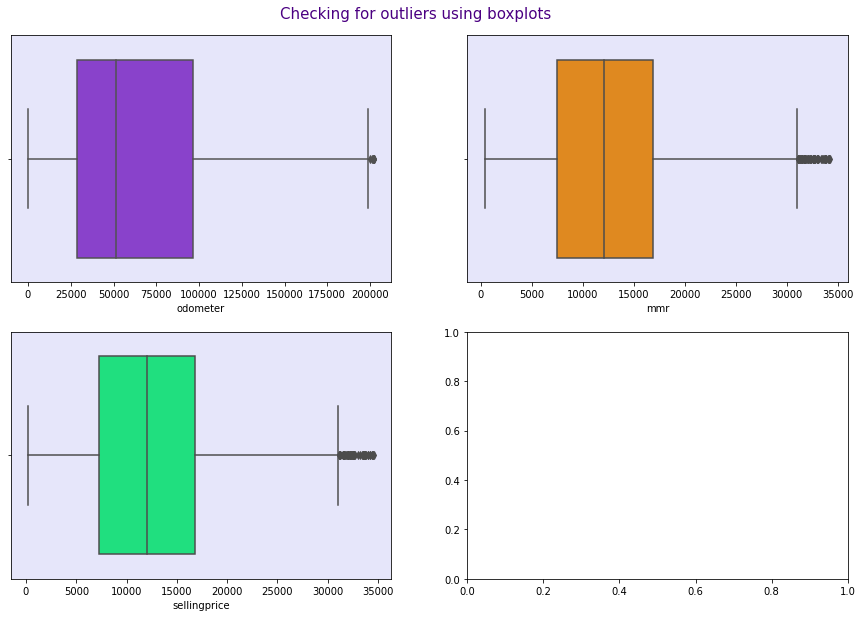

In [205]:
# Checking for Outliers
# Creating a list of columns to check for outliers
col_list = ['odometer', 'mmr','sellingprice']
# Creating a list of colors
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia']
# Plotting boxplots of the col_list columns to check for outliers
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), df_sample, col_list, colors):
    sns.boxplot(df_sample[column], ax = ax, color = color)
# Setting the background color to lavender
    ax.set_facecolor('lavender') 


## 7.Implementing the Solution

### 7.1 Artificial Neural Network

In [218]:
# Split the independent and dependent variables
# We want to predict the selling price of a used car, so let's use that column as our Y 
y = df_sample['sellingprice'].values
X = df_sample.drop(['sellingprice'], axis = 1).values


In [219]:
#Importing the tensorflow 
import tensorflow as tf

In [220]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, shuffle=True)

**Building the ANN**

In [221]:
#Initializing the ANN and assigning it to variable ann
ann = tf.keras.models.Sequential()

In [222]:
#Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [223]:
#Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [224]:
#Adding the output layer
ann.add(tf.keras.layers.Dense(units=1))

In [225]:
#Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['MeanSquaredLogarithmicError'])

In [226]:
#Training the ANN model on the Training set
model = ann.fit(X_train, y_train, batch_size = 32, epochs = 25,validation_data=(X_val, y_val),
              shuffle=True)

Epoch 1/25
73/73 [==============================] - 1s 4ms/step - loss: 116053744.0000 - mean_squared_logarithmic_error: 1.3828 - val_loss: 95868072.0000 - val_mean_squared_logarithmic_error: 1.0740
Epoch 2/25
73/73 [==============================] - 0s 2ms/step - loss: 86900704.0000 - mean_squared_logarithmic_error: 0.9205 - val_loss: 66116208.0000 - val_mean_squared_logarithmic_error: 0.7057
Epoch 3/25
73/73 [==============================] - 0s 2ms/step - loss: 57349664.0000 - mean_squared_logarithmic_error: 0.5787 - val_loss: 39758360.0000 - val_mean_squared_logarithmic_error: 0.3870
Epoch 4/25
73/73 [==============================] - 0s 2ms/step - loss: 33187768.0000 - mean_squared_logarithmic_error: 0.3339 - val_loss: 20051320.0000 - val_mean_squared_logarithmic_error: 0.2204
Epoch 5/25
73/73 [==============================] - 0s 3ms/step - loss: 18239160.0000 - mean_squared_logarithmic_error: 0.1847 - val_loss: 11140587.0000 - val_mean_squared_logarithmic_error: 0.1307
Epoch 6/2

In [227]:
#Predicting the results of the Test set
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[12547.7  12800.  ]
 [ 3594.38  4500.  ]
 [24775.16 24200.  ]
 ...
 [13771.39 13700.  ]
 [17025.94 17500.  ]
 [16887.01 15400.  ]]


In [231]:
import matplotlib.pyplot as plt
%matplotlib inline

In [234]:
import sklearn.metrics
evs_no=sklearn.metrics.explained_variance_score(y_test,ann.predict(X_test))
me_no=sklearn.metrics.max_error(y_test,ann.predict(X_test))
mae_no=sklearn.metrics.mean_absolute_error(y_test,ann.predict(X_test))
mse_no=sklearn.metrics.mean_squared_error(y_test,ann.predict(X_test))
msle_no=sklearn.metrics.mean_squared_log_error(y_test,ann.predict(X_test))
Mae_no=sklearn.metrics.median_absolute_error(y_test,ann.predict(X_test))
r2_no=sklearn.metrics.r2_score(y_test,ann.predict(X_test))


In [235]:
#Evaluating the Algorithm
print('Explained Variance Score:',evs_no)
print('Max Error               :',me_no)
print('Mean Absolute Error     :',mae_no)
print('Mean Square Error       :',mse_no)
print('Mean Squared Log Error  :',msle_no)
print('Median Absolute Error   :',Mae_no)
print('R2 Score                :',r2_no)


Explained Variance Score: 0.9505078748908449
Max Error               : 17414.9375
Mean Absolute Error     : 1085.1270572610097
Mean Square Error       : 2911453.4862826937
Mean Squared Log Error  : 0.06008037577940507
Median Absolute Error   : 702.81494140625
R2 Score                : 0.9504778696272922


dict_keys(['loss', 'mean_squared_logarithmic_error', 'val_loss', 'val_mean_squared_logarithmic_error'])


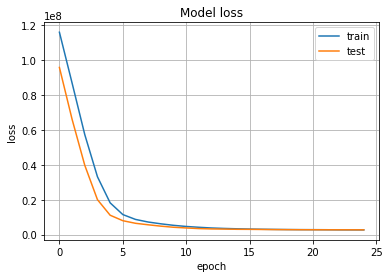

In [236]:
# list all data in history
print(model.history.keys())
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

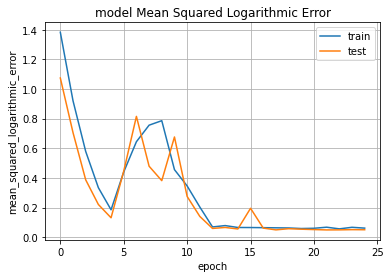

In [237]:
plt.plot(model.history['mean_squared_logarithmic_error'])
plt.plot(model.history['val_mean_squared_logarithmic_error'])
plt.grid()
plt.title('model Mean Squared Logarithmic Error')
plt.ylabel('mean_squared_logarithmic_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()